[9.99961409e-01 3.02153054e-05]
(10129, 4)
(10129, 1)


Text(0.5, 1.0, 'PCA')

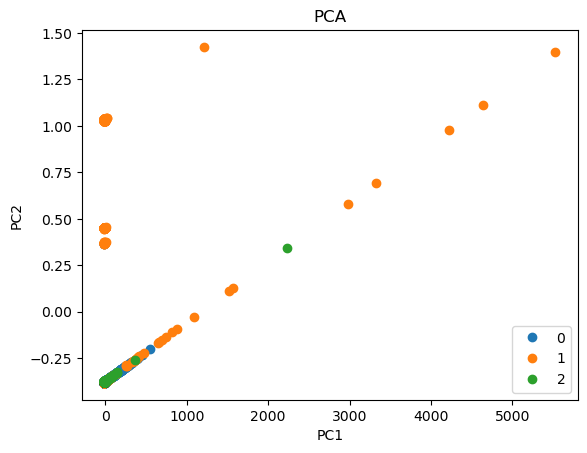

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
datadir = './relabeled_data/data'

X_train = pd.read_csv(f'{datadir}X_train.csv')
Y_train = pd.read_csv(f'{datadir}Y_train.csv')
X_train_norm = X_train.drop(['Ncodons'], axis = 1)
pca = PCA()
X_train_PCA = pca.fit_transform(X_train_norm)
print(pca.explained_variance_ratio_[:2])
# print(pca.singular_values_)
m = X_train_norm.shape[1]
K = 4
X_train_PCA = pd.DataFrame(X_train_PCA, 
                      columns=["PC%d" % k for k in range(1,m + 1)]).iloc[:,:K]
# Color classes
print(X_train_PCA.shape)
print(Y_train.shape)
X_train_PCA["class"] = Y_train
groups = X_train_PCA.groupby('class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["PC1"], group["PC2"], marker='o', linestyle='', label=name)
    # ax[1].plot(group["PC3"], group["PC4"], marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")


In [35]:
features = X_train_norm.columns
print(features)
pc = pd.DataFrame(pca.components_[:1]).T
pc["features"] = features
pc.sort_values(by=0, ascending=False, inplace=True)
pc.head(10)

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA', '0', '1', '2', '3', '4', '5', '6', '7', '9',
       '11', '12', 'Ncodons_Norm'],
      dtype='object')


,0,features
75,1.000000,Ncodons_Norm
64,0.000251,0
7,0.000012,CUG
19,0.000011,GCG
26,0.000008,GGC
52,0.000008,CGC
60,0.000007,GAG
15,0.000007,GUG
42,0.000006,CAG
23,0.000006,CCG
